In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train=X_train/256
X_test=X_test/256

In [5]:
print(X_train.shape,  X_test.shape)

(60000, 28, 28) (10000, 28, 28)


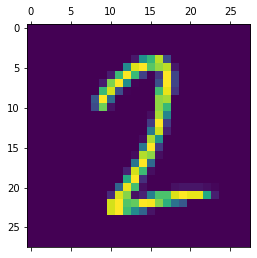

In [6]:
plt.matshow(X_test[456])

In [7]:
x_train=X_train.reshape(len(X_train) , len(X_train[0])*len(X_train[0]))
x_test=X_test.reshape(len(X_test) , len(X_test[0])*len(X_test[0]))

In [8]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [9]:
model=keras.Sequential([keras.layers.Dense(128,activation='relu'),keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.2532 - accuracy: 0.9278
Epoch 2/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1105 - accuracy: 0.9678
Epoch 3/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0764 - accuracy: 0.9770
Epoch 4/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0558 - accuracy: 0.9822
Epoch 5/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0430 - accuracy: 0.9862


In [10]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 129us/sample - loss: 0.0963 - accuracy: 0.9700


[0.09630177204976789, 0.97]

In [11]:
y_pred=model.predict(x_test)

 predicted:  7


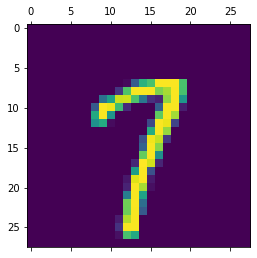

In [12]:
var=666

plt.matshow(X_test[var])
print(" predicted: ", np.argmax(y_pred[var]))

Text(69.0, 0.5, 'actual')

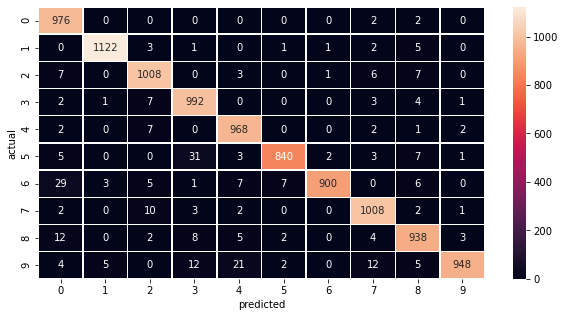

In [13]:
lis=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=lis)

plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True, linewidth=0.5, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [14]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    0,    0,    0,    0,    2,    2,    0],
       [   0, 1122,    3,    1,    0,    1,    1,    2,    5,    0],
       [   7,    0, 1008,    0,    3,    0,    1,    6,    7,    0],
       [   2,    1,    7,  992,    0,    0,    0,    3,    4,    1],
       [   2,    0,    7,    0,  968,    0,    0,    2,    1,    2],
       [   5,    0,    0,   31,    3,  840,    2,    3,    7,    1],
       [  29,    3,    5,    1,    7,    7,  900,    0,    6,    0],
       [   2,    0,   10,    3,    2,    0,    0, 1008,    2,    1],
       [  12,    0,    2,    8,    5,    2,    0,    4,  938,    3],
       [   4,    5,    0,   12,   21,    2,    0,   12,    5,  948]])>

In [15]:
X_train.shape

(60000, 28, 28)

### convolutional neural network on mnist

In [16]:
x2=X_train.reshape(60000,28,28,1)

In [17]:
x_test=X_test.reshape(10000,28,28,1)

In [18]:
mymodel2=keras.Sequential()
mymodel2.add(keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
mymodel2.add(keras.layers.MaxPooling2D(2,2))
mymodel2.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
mymodel2.add(keras.layers.MaxPooling2D(2,2))
mymodel2.add(keras.layers.Flatten())
mymodel2.add(keras.layers.Dense(128,activation='relu'))
mymodel2.add(keras.layers.Dense(10,activation='softmax'))

mymodel2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
mymodel2.fit(x2,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 375us/sample - loss: 0.1236 - accuracy: 0.9624
Epoch 2/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.0394 - accuracy: 0.9877
Epoch 3/10
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0274 - accuracy: 0.9914
Epoch 4/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0201 - accuracy: 0.9936
Epoch 5/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0147 - accuracy: 0.9956
Epoch 6/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.0110 - accuracy: 0.9964
Epoch 7/10
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0096 - accuracy: 0.9968
Epoch 8/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.0081 - accuracy: 0.9973
Epoch 9/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0070 - accuracy: 0.9

In [20]:
mymodel2.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 179us/sample - loss: 0.0336 - accuracy: 0.9925


[0.033585294890313915, 0.9925]

### Horse vs Human classification using my own dataset 

In [21]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 33, 33, 64)       

### training and validation together using image data generator

#### training using the bad coursera data - pencil human and fat horse- shows how misrepresentative the training dataset is

In [24]:
batch_size=16
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\User\horsehuman',     
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\User\Desktop\test',
        target_size=(300, 300),
        batch_size=16,
        class_mode='binary')

model.fit_generator(
        train_generator,
        steps_per_epoch=8 ,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=74 // batch_size)

Found 1027 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 4 steps
Epoch 1/25
8/8 [==============================] - 7s 887ms/step - loss: 0.7763 - accuracy: 0.5098 - val_loss: 0.7311 - val_accuracy: 0.5781
Epoch 2/25
8/8 [==============================] - 5s 633ms/step - loss: 0.8621 - accuracy: 0.6608 - val_loss: 0.7462 - val_accuracy: 0.5000
Epoch 3/25
8/8 [==============================] - 5s 587ms/step - loss: 0.4116 - accuracy: 0.8625 - val_loss: 1.8584 - val_accuracy: 0.5312
Epoch 4/25
8/8 [==============================] - 5s 591ms/step - loss: 0.3337 - accuracy: 0.8647 - val_loss: 2.2212 - val_accuracy: 0.5156
Epoch 5/25
8/8 [==============================] - 5s 644ms/step - loss: 0.2921 - accuracy: 0.8867 - val_loss: 2.1264 - val_accuracy: 0.5312
Epoch 6/25
8/8 [==============================] - 5s

In [25]:
predict_datagen = ImageDataGenerator(rescale=1./255)
prediction_generator = predict_datagen.flow_from_directory(
        r'C:\Users\User\Desktop\new_images',
        target_size=(300, 300),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

pred=model.predict_generator(
        prediction_generator, 
        steps=len(prediction_generator),
        verbose=1
        )    # gives a 1d array of class probabilities. in this case, a single probability
pred=pred.flatten()

Found 32 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
32/32 [==============================] - 3s 85ms/step


In [26]:
# for converting probailites into the corresponding predicted classes
predicted_class_indices=[] 
for i in pred:
    if i<0.5:
        predicted_class_indices.append(0)
    else:
        predicted_class_indices.append(1)        
# predicted_class_indices=np.argmax(pred,axis=1)   <- use this instead of above code if a multi class classification is used


# for getting the actual class labels
true_labels= [] 
classlabel=0
for i in os.listdir(r'C:\Users\User\Desktop\new_images'):
    j=os.path.join(r'C:\Users\User\Desktop\new_images',i)
    l=len(os.listdir(j))
    for k in range(l):
        true_labels.append(classlabel)
    classlabel+=1

Text(69.0, 0.5, 'actual')

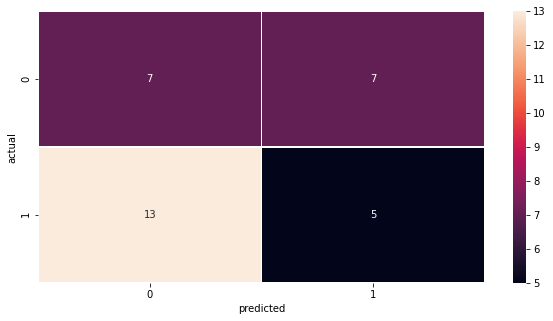

In [27]:
cm=tf.math.confusion_matrix(labels=true_labels,predictions=predicted_class_indices)

plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True, linewidth=0.5)
plt.xlabel('predicted')
plt.ylabel('actual')

#### using my own data for training and coursera data for validation with image augmentation

In [28]:
train_datagen = ImageDataGenerator(
        rescale=1/255,   # All images will be rescaled by 1./255
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\User\Desktop\test',     
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\User\horsehuman',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

model.fit_generator(
        train_generator,
        steps_per_epoch=3 ,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=1024 // 32)

Found 74 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 32 steps
Epoch 1/25
3/3 [==============================] - 10s 3s/step - loss: 0.9327 - accuracy: 0.6429 - val_loss: 0.1803 - val_accuracy: 0.9375
Epoch 2/25
3/3 [==============================] - 10s 3s/step - loss: 0.8939 - accuracy: 0.5000 - val_loss: 0.3853 - val_accuracy: 0.8623
Epoch 3/25
3/3 [==============================] - 9s 3s/step - loss: 0.6654 - accuracy: 0.5952 - val_loss: 0.4529 - val_accuracy: 0.7803
Epoch 4/25
3/3 [==============================] - 10s 3s/step - loss: 0.5966 - accuracy: 0.7083 - val_loss: 0.3735 - val_accuracy: 0.8740
Epoch 5/25
3/3 [==============================] - 11s 4s/step - loss: 0.5891 - accuracy: 0.6458 - val_loss: 0.3913 - val_accuracy: 0.8076
Epoch 6/25
3/3 [==============================] - 11s 4s/step - loss: 0.7014 - accuracy: 0.5833 - val_loss: 0.4917 - val_accuracy: 0.7832


In [29]:
predict_datagen = ImageDataGenerator(rescale=1./255)
prediction_generator = predict_datagen.flow_from_directory(
        r'C:\Users\User\Desktop\new_images',
        target_size=(300, 300),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

pred=model.predict_generator(
        prediction_generator, 
        steps=len(prediction_generator),
        verbose=1
        )    # gives a 1d array of class probabilities. in this case, a single probability
pred=pred.flatten()

Found 32 images belonging to 2 classes.
32/32 [==============================] - 1s 27ms/step


In [30]:
# for converting probailites into the corresponding predicted classes
predicted_class_indices=[] 
for i in pred:
    if i<0.5:
        predicted_class_indices.append(0)
    else:
        predicted_class_indices.append(1)        
# predicted_class_indices=np.argmax(pred,axis=1)   <- use this instead of above code if a multi class classification is used


# for getting the actual class labels
true_labels= [] 
classlabel=0
for i in os.listdir(r'C:\Users\User\Desktop\new_images'):
    j=os.path.join(r'C:\Users\User\Desktop\new_images',i)
    l=len(os.listdir(j))
    for k in range(l):
        true_labels.append(classlabel)
    classlabel+=1

Text(69.0, 0.5, 'actual')

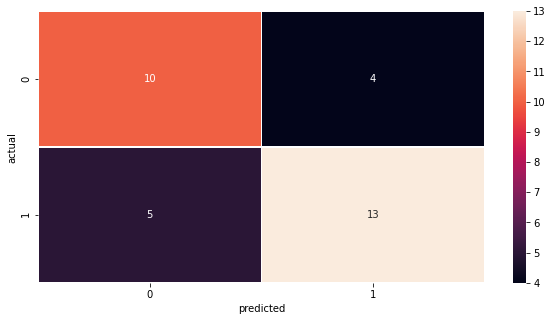

In [31]:
cm=tf.math.confusion_matrix(labels=true_labels,predictions=predicted_class_indices)

plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True, linewidth=0.5)
plt.xlabel('predicted')
plt.ylabel('actual')

##### for getting the predictions in a tabular form with image vs corresponding prediction, do this

#### generating more images - for fun

#### predicting a single image

### transfer learning

In [41]:
IMG_SIZE=160
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [42]:
base_model2.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [61]:
base_model2.trainable = False

In [62]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

In [63]:
new_model = tf.keras.Sequential([
  base_model2,
  global_average_layer,
  prediction_layer
])

In [64]:
base_learning_rate = 0.0001
new_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
batch_size=16
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\User\horsehuman',     
        target_size=(160, 160),  # All images will be resized to 300x300
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\User\Desktop\test',
        target_size=(160, 160),
        batch_size=16,
        class_mode='binary')

new_model.fit_generator(
        train_generator,
        steps_per_epoch=8 ,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=74 // batch_size)

Found 1027 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 4 steps
Epoch 1/25
8/8 [==============================] - 7s 821ms/step - loss: 0.7612 - accuracy: 0.4945 - val_loss: 0.6646 - val_accuracy: 0.5000
Epoch 2/25
8/8 [==============================] - 3s 385ms/step - loss: 0.6784 - accuracy: 0.5166 - val_loss: 0.6361 - val_accuracy: 0.5156
Epoch 3/25
8/8 [==============================] - 3s 383ms/step - loss: 0.6343 - accuracy: 0.5543 - val_loss: 0.6133 - val_accuracy: 0.5625
Epoch 4/25
8/8 [==============================] - 3s 417ms/step - loss: 0.6312 - accuracy: 0.6152 - val_loss: 0.5881 - val_accuracy: 0.5781
Epoch 5/25
8/8 [==============================] - 3s 419ms/step - loss: 0.5947 - accuracy: 0.6445 - val_loss: 0.5634 - val_accuracy: 0.5781
Epoch 6/25
8/8 [==============================] - 3s 425ms/step - loss: 0.5510 - accuracy: 0.6758 - val_loss: 0.5416 - val_accur

In [66]:
predict_datagen = ImageDataGenerator(rescale=1./255)
prediction_generator = predict_datagen.flow_from_directory(
        r'C:\Users\User\Desktop\new_images',
        target_size=(160, 160),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

pred=new_model.predict_generator(
        prediction_generator, 
        steps=len(prediction_generator),
        verbose=1
        )    # gives a 1d array of class probabilities. in this case, a single probability
pred=pred.flatten()

Found 32 images belonging to 2 classes.
32/32 [==============================] - 2s 51ms/step


In [67]:
# for converting probailites into the corresponding predicted classes
predicted_class_indices=[] 
for i in pred:
    if i<0.5:
        predicted_class_indices.append(0)
    else:
        predicted_class_indices.append(1)        
# predicted_class_indices=np.argmax(pred,axis=1)   <- use this instead of above code if a multi class classification is used


# for getting the actual class labels
true_labels= [] 
classlabel=0
for i in os.listdir(r'C:\Users\User\Desktop\new_images'):
    j=os.path.join(r'C:\Users\User\Desktop\new_images',i)
    l=len(os.listdir(j))
    for k in range(l):
        true_labels.append(classlabel)
    classlabel+=1

Text(69.0, 0.5, 'actual')

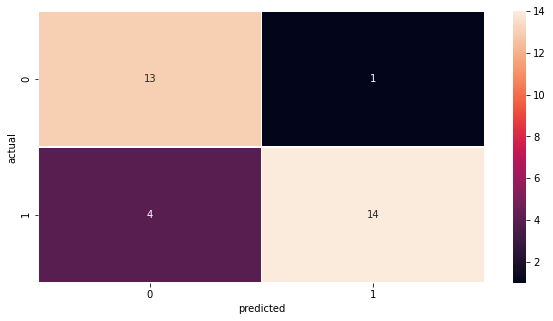

In [68]:
cm=tf.math.confusion_matrix(labels=true_labels,predictions=predicted_class_indices)

plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True, linewidth=0.5)
plt.xlabel('predicted')
plt.ylabel('actual')

In [69]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=prediction_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results

,Filename,Predictions
0,horse\download (1).jpg,horse
1,horse\download.jpg,horse
2,horse\photo-1485201567137-7771be2f710c.jpg,horse
3,horse\photo-1497781495506-ce58b286d8f5.jpg,horse
4,horse\photo-1504291310234-fdc312c67b04.jpg,horse
5,horse\photo-1504310977373-186d29f99322.jpg,human
6,horse\photo-1511825869128-e85768033761.jpg,horse
7,horse\photo-1512397476661-a9ec6ffd4a93.jpg,horse
8,horse\photo-1513223848047-2456e15b4f7d.jpg,horse
9,horse\photo-1522564943606-a719b0859d58.jpg,horse
